In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        print(Data)
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [3]:
x, validData, testData, y, validTarget, testTarget = loadData()

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.00784314 0.00392157 0.        ]
  ...
  [0.         0.         0.         ... 0.00392157 0.         0.        ]
  [0.         0.         0.         ... 0.00392157 0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.         0.         0.         ... 0.00392157 0.00392157 0.        ]
  [0.         0.      

In [4]:
y.shape

(3500, 1)

def MSE(W, b, x, y, reg):
    sum = 0
    for i in range(len(x)):
        sum += (np.linalg.norm(np.dot(W.flatten(),x[i].flatten()) + b[i] - y[i])**2)*(1/(2*len(x))) + (reg/2)*((np.linalg.norm(W))**2)
    return sum

In [4]:
def MSE(W, b, x, y, reg):
    mse = 0
# =============================================================================
#   Checking the dimensions of the matrices
#     print(np.shape(x))
#     print(np.shape(W))
#   Note: it's faster to multiple than divide by 5%
# =============================================================================
    mse = np.sum(((W.transpose() @ x.transpose())+b-y.transpose())**2)*(1/(2*len(y)))
    mse+= (reg/2)*(np.linalg.norm(W)**2)
    return mse

In [6]:
print(MSE(np.ones(28*28), np.zeros(3500), x, y, 0.1))

AttributeError: module 'numpy' has no attribute 'Transpose'

def gradMSE(W, b, x, y, reg):
    
    GradWRTW = np.zeros(shape = (28,28))
    GradWRTB = 0
    for i in range(len(x)):
        GradWRTW += ((np.linalg.norm(np.dot(W.flatten(),(x[i].flatten()).T) + b[i] - y[i]))*x[i]*(1/(len(x))) + reg*((np.linalg.norm(W)))).reshape(28, 28)
        GradWRTB += ((np.linalg.norm(np.dot(W.flatten(),(x[i].flatten()).T) + b[i] - y[i])))*(1/(len(x)))
    
    return GradWRTW, GradWRTB
    
    

In [5]:
def gradMSE(W, b, x, y, reg):
 
# =============================================================================
#     gradB is 1x3500 array
#     x is 3500x784 array
# =============================================================================
    
    gradB= (1/len(y))*((W.transpose() @ x.transpose()) + b - y.transpose())
#    print(np.shape(gradB)) # results above
    gradW= (gradB @ x).transpose() + reg*W
    gradB = np.sum(gradB)
    
    return gradW, gradB

In [ ]:
def crossEntropyLoss(W, b, x, y, reg):
    # Your implementation here

In [ ]:
def gradCE(W, b, x, y, reg):
    # Your implementation here


In [6]:
def calcAcc(W,x,y,b):
    return ((((W.transpose() @ x.transpose()) + b).transpose() > 0.5).astype(int) == y).astype(int).sum() / y.shape[0]

In [93]:
validData.shape

(100, 28, 28)

In [94]:
x.shape

(3500, 28, 28)

In [96]:
x.shape

(28, 28)

In [97]:
validTarget.shape

(100, 1)

In [99]:
testData.shape

(145, 28, 28)

In [34]:
def grad_descent(W, b, trainingData, trainingLabels, validData, validTarget, testData, testTarget, alpha, iterations, reg, EPS):
    print (np.shape(trainingData))
    print(np.shape(W))
    
# =============================================================================
#     Flatten the matrices
# =============================================================================
    N = trainingData.shape[0]
    M = validData.shape[0]
    O = testData.shape[0]
    x = np.reshape(trainingData, (N, -1))
    validData = np.reshape(validData, (M, -1))
    testData =np.reshape(testData, (O, -1))
    W = np.reshape(W, (-1, 1))
    print("1")
# =============================================================================
#     Make new variables (lists to store accuracy and loss)
# =============================================================================
    errorList = []
    accuracyList = []
    valLossList = []
    testLossList = []
    wDiff = 100
    print("2")
# =============================================================================
#     Initial calculations and storage
# =============================================================================
    
    accuracy = calcAcc(W,x,trainingLabels,b)
    print("accuracy: %d" %accuracy)
    error = MSE(W,b,x,trainingLabels,reg)
    errorList.append(error)
    accuracyList.append(accuracy)
    val_loss = MSE(W, b, validData, validTarget, reg)
    valLossList.append(val_loss)
    test_loss = MSE(W, b, testData, testTarget, reg)
    testLossList.append(test_loss)
# =============================================================================
#     Gradient Descent
# =============================================================================
    for i in range(iterations):
        if wDiff < EPS:
            break
        
        gradW, gradB = gradMSE(W, b, x, trainingLabels, reg)
        W_new = np.subtract(W,alpha*gradW)
        wDiff = np.linalg.norm(W_new-W)
#       print(np.shape(W_new),np.shape(W))
        W = W_new
        b = b - alpha*gradB
   
# =============================================================================
#     Update lists
# =============================================================================

        error= MSE(W,b,x,trainingLabels,reg)
        errorList.append(error)
        accuracy = calcAcc(W,x,trainingLabels,b)
        accuracyList.append(accuracy)
        val_loss = MSE(W, b, validData, validTarget, reg)
        valLossList.append(val_loss)
        test_loss = MSE(W, b, testData, testTarget, reg)
        testLossList.append(test_loss)
        
        print("Epoch: " ,i, "Test Error: ", error, " Validation Loss: ", val_loss, " Test Loss: ", test_loss, " Accuracy: ",accuracy)
    return W,b,errorList,accuracyList,valLossList,testLossList

In [45]:
def plotLab1(errorsList, validationErrorList, testErrorList, accuracyList, learningRate, reg):
    plt.plot(errorsList, label = "Training Error")
    plt.plot(validationErrorList, label = "Validation Error")
    plt.plot(testErrorList, label = "Test Error")
    plt.xlabel("Epoch")
    plt.title(("Lab 1 Part 1: Training and Validation Loss w/ LR={}, reg={}".format(learningRate, reg)))
    #plt.ylim([0, 1000])
    plt.legend(loc='best')
    plt.show()
    plt.savefig(('lab1_part1_training_loss_plot_lr={}_reg={}.png').format(learningRate, reg))
    
    plt.plot(accuracyList, label = "Accuracy", color = "red")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(("Lab 1 Part 1: Accuracy w/ LR={}, reg={}".format(learningRate, reg)))
    plt.ylim([0, 1])
    plt.legend(loc='best')
    plt.show()
    plt.savefig(('lab1_part1_accuracy_plot_lr={}_reg={}.png').format(learningRate, reg))
    


In [40]:
test_loss

[46915.5555557677,
 34972.79231062748,
 26087.245469506575,
 19476.153160942704,
 14557.171599634466,
 10897.05821146906,
 8173.495055723855,
 6146.687652759819,
 4638.236022267629,
 3515.4157597998446,
 2679.4838421928343,
 2056.978596368938,
 1593.2471650137265,
 1247.6301215354595,
 989.8789322303804,
 797.4906101876348,
 653.724730551234,
 546.1281049780736,
 465.43714457953786,
 404.7612180949271,
 358.9750686009873,
 324.26676967461896,
 297.8014037928657,
 277.4708394040171,
 261.7075668441841,
 249.34619538027337,
 239.52041128317128,
 231.5863198215721,
 225.06541756129965,
 219.60217004919133,
 214.93245613524465,
 210.86009713195267,
 207.2394010092449,
 203.96218158176126,
 200.94810681311162,
 198.13752364687795,
 195.4861249986564,
 192.9609869193011,
 190.53762476066703,
 188.19780707661403,
 185.9279328867255,
 183.71782770569757,
 181.55985077840052,
 179.44823351881104,
 177.37858965578462,
 175.34755284476586,
 173.35250885498053,
 171.3913978857578,
 169.46256884705

In [43]:
lr = 0.001
epoch = 5000
reg = 0
W_best,B_best,training_loss,accuracy,validation_loss,test_loss = grad_descent(np.ones(shape=(28,28)), 0, x, y, validData, validTarget, testData, testTarget, 0.001, epoch, 0, 10**(-7))

(3500, 28, 28)
(28, 28)
1
2
accuracy: 0
Epoch:  0 Test Error:  33331.52821790092  Validation Loss:  35350.27304152423  Test Loss:  34972.79231062748  Accuracy:  0.502
Epoch:  1 Test Error:  24872.922378418694  Validation Loss:  26582.998069317782  Test Loss:  26087.245469506575  Accuracy:  0.502
Epoch:  2 Test Error:  18579.05595168108  Validation Loss:  20033.061156297124  Test Loss:  19476.153160942704  Accuracy:  0.502
Epoch:  3 Test Error:  13895.581346047931  Validation Loss:  15136.41548656502  Test Loss:  14557.171599634466  Accuracy:  0.502
Epoch:  4 Test Error:  10410.121789326364  Validation Loss:  11472.920742007698  Test Loss:  10897.05821146906  Accuracy:  0.502
Epoch:  5 Test Error:  7815.911221186481  Validation Loss:  8729.567495275502  Test Loss:  8173.495055723855  Accuracy:  0.502
Epoch:  6 Test Error:  5884.746413552811  Validation Loss:  6673.10845324658  Test Loss:  6146.687652759819  Accuracy:  0.502
Epoch:  7 Test Error:  4446.866350317058  Validation Loss:  512

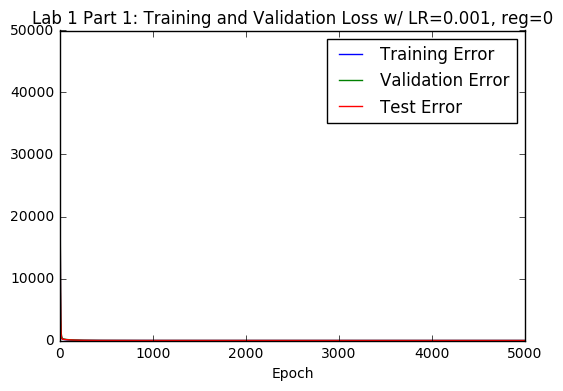

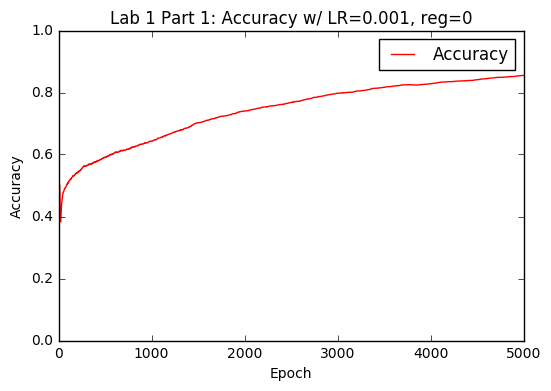

In [46]:
plotLab1(training_loss, validation_loss, test_loss,  accuracy, "0.001", "0")

In [70]:
lr = 0.005
epoch = 5000
reg = 0
W_best,B_best,training_loss,accuracy,validation_loss,test_loss = grad_descent(np.ones(shape=(28,28)), 0, x, y, validData, validTarget, testData, testTarget, 0.005, 300, 0, 10**(-7))

(3500, 28, 28)
(28, 28)
accuracy: 0
Epoch:  0  Error:  4634.578692373464  Accuracy:  0.502
Epoch:  1  Error:  696.9442965107762  Accuracy:  0.4022857142857143
Epoch:  2  Error:  291.24087060253237  Accuracy:  0.3717142857142857
Epoch:  3  Error:  233.96236760836612  Accuracy:  0.4188571428571429
Epoch:  4  Error:  213.37795680894763  Accuracy:  0.43857142857142856
Epoch:  5  Error:  198.39769813080622  Accuracy:  0.4511428571428571
Epoch:  6  Error:  185.52487427313432  Accuracy:  0.4622857142857143
Epoch:  7  Error:  174.0906427091414  Accuracy:  0.4694285714285714
Epoch:  8  Error:  163.7943346598624  Accuracy:  0.4774285714285714
Epoch:  9  Error:  154.4347652456052  Accuracy:  0.4828571428571429
Epoch:  10  Error:  145.8645536089696  Accuracy:  0.48514285714285715
Epoch:  11  Error:  137.97239528253036  Accuracy:  0.49057142857142855
Epoch:  12  Error:  130.67225765924988  Accuracy:  0.4928571428571429
Epoch:  13  Error:  123.89609978675892  Accuracy:  0.4957142857142857
Epoch:  14

In [2]:
def buildGraph(beta1=None, beta2=None, epsilon=None, lossType=None, learning_rate=None):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)
    W = tf.truncated_normal(shape = (28*28, 1), stddev = 0.5, dtype = tf.float32, seed = 421, name = "weight")
    #not sure how to specify the shape for a float number
    B = tf.truncated_normal(shape = tf.float32, stddev = 0.5, dtype = tf.float32, seed = 421, name = "bias")
    if lossType == "MSE":
        x = tf.placeholder(tf.float32, shape = (3200, 28*28))
        y = tf.placeholder(tf.float32, shape = (3200, 1))
        reg = tf.placeholder(tf.float32)
        
    # Your implementation
    elif lossType == "CE":
        print(2)
    #Your implementation here